In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=7ccea1106579d5975231e67813b124b7f2817d0910abca1dd21e85eb81e72d6b
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20


# **Data Cleaning**

In [ ]:
#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
# shuffle=False to load the data in the order rather than loading in random order
# loading only useful data and removing un-necessary header etc..
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


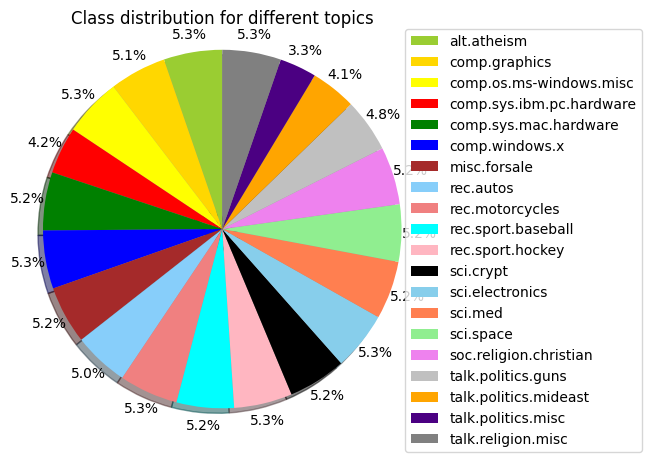

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts, autotexts = plt.pie(val, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2, autopct='%1.1f%%')

plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')

# Displaying numbers on pie chart slices
for autotext in autotexts:
    autotext.set_color('black')

plt.show()


In [ ]:
# First 2 documents
for i in range(2):
    doc = corpus[i]
    category = dataset.target_names[gnd_labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

# Tokenization

In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=6bb70fbc4769935eac292e46b1efc12d54dd0fb88211dde4af60a6f1f3be7989
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [ ]:
# perform more Pre-processing steps
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Build Vocabulary

In [ ]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


# Training Word2Vec

In [ ]:
from gensim.models import word2vec #Library
from sklearn.neighbors import KDTree #For KNN
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import time
import pandas as pd


In [ ]:
# train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
# Dimensionality of the hidden layer representation
num_features = 100
# Minimum word count to keep a word in the vocabulary
min_word_count = 20
# Context window size (on each side)- Moderate context window
context = 5
# Downsample setting for frequent words
#Used to reduce the influence of very frequent words during training. It helps to speed up training and improve the quality of word vectors by mitigating the dominance of highly frequent words that may not carry as much semantic meaning.
downsampling = 1e-3

# Initialize and train the model.
print("Training model...");
w2v_model = word2vec.Word2Vec(Vocab_v1, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)
# calling init_sims to make the model more memory efficient by normalizing the vectors in-place.
w2v_model.init_sims(replace=True);
# Save the model
model_name = "model_full_20newsGroup";
w2v_model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

Training model...


Total time: 23.383812189102173 secs


In [ ]:
word_vectors = w2v_model.wv.vectors
print(word_vectors[0].shape)
# print word vector for the first word: 100-element vector with values
word_vectors[0]

(100,)


array([-0.10889892,  0.04437986, -0.11674817,  0.0558724 , -0.14054865,
        0.06069354,  0.00408466, -0.13850838, -0.00896788, -0.06949271,
        0.14158694,  0.11478933, -0.06038058,  0.10390341, -0.01567247,
        0.006471  , -0.05129597,  0.18265551, -0.11032801, -0.05591194,
        0.09774549,  0.03917009,  0.13385276, -0.00916499,  0.15724926,
       -0.01255882, -0.009456  ,  0.08022305,  0.02409451,  0.07421973,
       -0.14915632,  0.07141382,  0.274109  , -0.19317317,  0.01817694,
       -0.0542393 ,  0.01217766,  0.04797361, -0.01611834,  0.01157256,
       -0.06145086, -0.0499848 , -0.03059165,  0.06072204,  0.00415749,
        0.00332103,  0.00714527,  0.11218683, -0.00313097, -0.03884538,
       -0.13094011,  0.24387169,  0.06793693,  0.07293416,  0.20567378,
       -0.13398197,  0.08852661, -0.08165684, -0.09903849,  0.06119572,
       -0.11886633,  0.00065424,  0.06652611, -0.07105053, -0.05820719,
        0.03398333,  0.04608995,  0.18899646,  0.08277519, -0.02

In [ ]:
# print length of word vectors
len(word_vectors)

11595

# PCA

Explained Variance for Principal Component 1: 25.14%
Explained Variance for Principal Component 2: 18.84%
Explained Variance for Principal Component 3: 12.23%
Explained Variance for Principal Component 4: 9.17%
Explained Variance for Principal Component 5: 7.17%


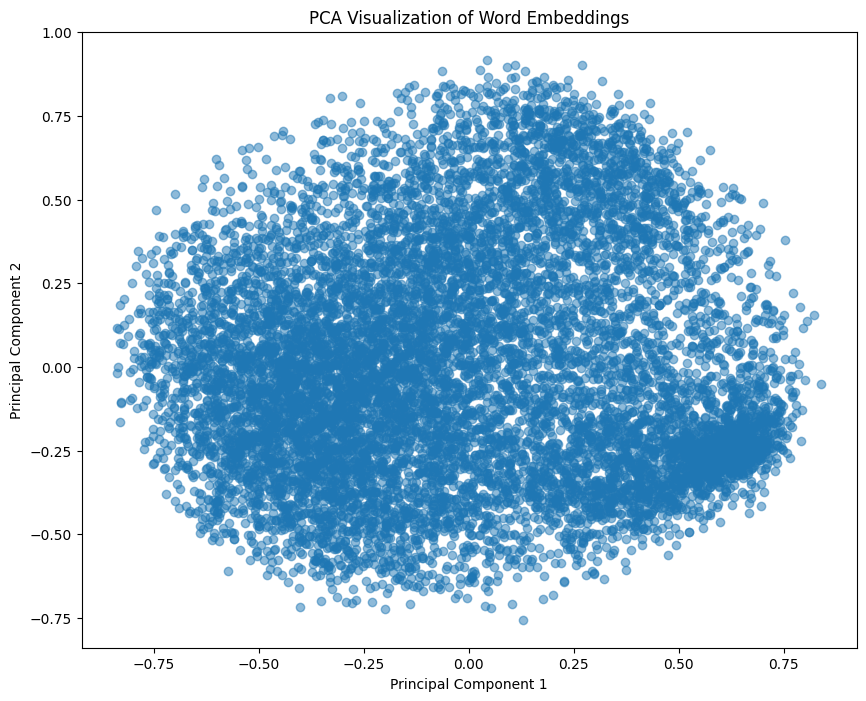

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=5)


# Fit PCA to the word vectors
pca.fit(word_vectors)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance for Principal Component {i+1}: {ratio:.2%}")

# Fit and transform the word vectors using PCA
word_vectors_pca = pca.fit_transform(word_vectors)


# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# K Means

In [ ]:
# cluster the words using KMeans
num_clusters = 20 #20 topics
# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters = num_clusters)
clusters = kmeans_clustering.fit_predict(word_vectors)
centers = kmeans_clustering.cluster_centers_
centroid_map = dict(zip(w2v_model.wv.index_to_key, clusters))

In [ ]:
# get words in each cluster that are closest to the cluster center
# initialize a KDTree on the word vectors, and query it for the Top K words on each cluster center.
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [ ]:
# get the top words and print the first 2 in each cluster:
top_words = get_top_words(w2v_model.wv.index_to_key, 5000, centers, word_vectors)
top_words[:5]

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14,Cluster #15,Cluster #16,Cluster #17,Cluster #18,Cluster #19
1,relative,mattingly,blanket,4mb,invaded,thin,anymore,functioning,licensed,263,5f,gibson,x386,preached,involvement,faqs,initialization,stayed,emotional,massachusetts
2,acceptable,canadiens,perceive,386sx,prisoners,valves,bother,permanently,specialized,429,8p,steven,xpm,saints,regulation,additions,macro,entryway,justification,sponsored
3,tends,cardinals,confess,motherboards,grandparents,lighter,figured,projection,procedures,nyr,py,freenet,ghostscript,praying,welfare,queries,pixmaps,waited,inherently,pennsylvania
4,technique,tigers,insisted,50mhz,invasion,revs,hmmm,proportional,evaluation,ott,cq,ralph,interpreter,christ's,courts,summary,pixmap,walking,validity,oregon
5,potentially,roster,seldom,vcr,terror,compartment,cares,sperm,schemes,348,yn,uwaterloo,pexlib,savior,gov't,reader,vector,wound,accepting,1924


In [ ]:
# Create a word cloud with the words of a cluster and print and save them.
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

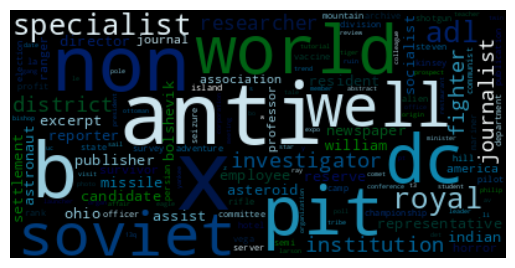

In [ ]:
# call on each cluster, and pass in a different color scheme in each iteration to distinguish them.
from wordcloud import WordCloud
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(0, 20):
    col = next(cmaps)
    display_cloud(i, col)

In [ ]:

from sklearn.manifold import TSNE
import matplotlib.cm as cm
words_20ng = []
embeddings_20ng = []
for word in list(w2v_model.wv.vocab):
    embeddings_20ng.append(w2v_model.wv[word])
    words_20ng.append(word)

#t-SNE is to reduce the dimensionality of the word embeddings to 2D.
#Focuses on preserving the local structure of the data by keeping similar data points close together in the lower-dimensional space.
tsne_w2v_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_w2v_2d = tsne_w2v_2d.fit_transform(embeddings_20ng)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(8, 6))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('20 Newsgroup dataset', embeddings_w2v_2d, a=0.1)

NameError: name 'w2v_model' is not defined

In [ ]:
#This Part is for my reference. - Chethana

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups


# perform more Pre-processing steps
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint

#Word2Vec
from gensim.models import word2vec #Library
from sklearn.neighbors import KDTree #For KNN
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import time
import pandas as pd

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts = plt.pie(val,colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
# plt.legend(patches, labels, loc="best")
plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')
plt.show()


def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])

# train the Word2Vec model on the cleaned sentences
start = time.time()
# Set values for various parameters
# Dimensionality of the hidden layer representation
num_features = 100
# Minimum word count to keep a word in the vocabulary
min_word_count = 20
# Context window size (on each side)- Moderate context window
context = 5
# Downsample setting for frequent words
#Used to reduce the influence of very frequent words during training. It helps to speed up training and improve the quality of word vectors by mitigating the dominance of highly frequent words that may not carry as much semantic meaning.
downsampling = 1e-3

# Initialize and train the model.
print("Training model...");
w2v_model = word2vec.Word2Vec(Vocab_v1, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)
# calling init_sims to make the model more memory efficient by normalizing the vectors in-place.
w2v_model.init_sims(replace=True);
# Save the model
model_name = "model_full_20newsGroup";
w2v_model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

word_vectors = w2v_model.wv.vectors
print(word_vectors[0].shape)
# print word vector for the first word: 100-element vector with values
word_vectors[0]

# print length of word vectors
len(word_vectors)

#K-Means Part:

# cluster the words using KMeans
num_clusters = 20 #20 topics
# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters = num_clusters)
clusters = kmeans_clustering.fit_predict(word_vectors)
centers = kmeans_clustering.cluster_centers_
centroid_map = dict(zip(w2v_model.wv.index_to_key, clusters))

# get words in each cluster that are closest to the cluster center
# initialize a KDTree on the word vectors, and query it for the Top K words on each cluster center.
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

# get the top words and print the first 2 in each cluster:
top_words = get_top_words(w2v_model.wv.index_to_key, 5000, centers, word_vectors)
top_words[:5]

# Create a word cloud with the words of a cluster and print and save them.
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')


# call on each cluster, and pass in a different color scheme in each iteration to distinguish them.
from wordcloud import WordCloud
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(0, 20):
    col = next(cmaps)
    display_cloud(i, col)


HTTPError: HTTP Error 403: Forbidden